---

title: 用模拟的方法学习统计学之中心极限定理
date: 2024-09-17
author: 郝鸿涛
slug: stats-simulation
draft: false
toc: true
tags: 统计学

---

我学习统计学比较喜欢的方法是：
- 问题为先导
- 用频率，不用密度
- 模拟为先，如有必要再继续用数学公式（如无必要则只用模拟）

这篇主要讲标准误 (standard error) 和中心极限定理 (Central Limit Theorem)。我说了以问题为先导，那我们先来看一个问题：

>全球人类的智商分布符合正态分布， $\mathcal{N}(100, 15^2)$。我们从全球 80 亿人中随机抽取 100 个人，这 100 人的平均智商大于等于 $110$ 的概率是多少？

## 标准误

如果我们只用模拟，不用数学公式。上面这题就很好解决：80 亿人抽 100 个人，我们重复 1 万次，每次都算出平均值。平均值大于等于 110 的次数除以 1 万，就是随机抽取 100 人，该 100 人平均智商大于等于 110 的概率。这个应该很好理解吧？

但我们不满足于此。我们想看看从正态分布为 $\mathcal{N}(\mu, \sigma^2)$ 的母体中随机抽取 $M$ 个大小为 $N$ 的样本。每个样本算出其平均值 ($\bar{X}$)，也就是说总共有 $M$ 个 $\bar{X}$。我们想看一下所有 $\bar{X}$ 的分布是否存在某种规律。顺带提一句：这个分布的标准差被称为「标准误 (standard error)」。

我们先把母体的正态分布模拟一下：

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Set the seed for reproducibility
np.random.seed(42)

# Parameters for the normal distribution
mean = 100       # Mean of the distribution
std_dev = 15    # Standard deviation of the distribution
size = 100000    # Number of data points

# Generate the data
data = np.random.normal(mean, std_dev, size)

population_mu = np.mean(data)
population_sigma = np.std(data)

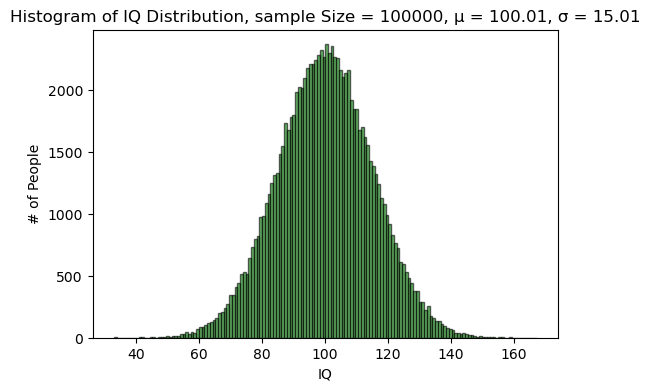

In [73]:
# Create a histogram of the data
plt.figure(figsize=(6, 4))
plt.hist(data, bins="auto", density=False, alpha=0.6, color='g', edgecolor='black')

# Add titles and labels
plt.title(f"Histogram of IQ Distribution, sample Size = {size}, "\
          f"μ = {population_mu:.2f}, σ = {population_sigma:.2f}")
plt.xlabel('IQ')
plt.ylabel('# of People')

# Show the plot
plt.show()

然后我们从母体中抽取 `num_sample` 个大小为 `sample_size` 的样本，得到每个样本的平均值：

In [74]:
def obtain_sample_means(data, sample_size, num_samples):
    """sample from data, each time to get a sample of sample_size 
    and calcuate the sample's mean.
    Continue for num_samples times. 
    """
    sample_means = np.zeros(num_samples)
    for i in range(num_samples):
        sample = np.random.choice(data, size=sample_size, replace=False)
        sample_means[i] = np.mean(sample)
    return sample_means

In [75]:
num_samples = 2000
sample_sizes = [10, 100, 1000, 10000]
sample_means = {size: obtain_sample_means(
    data, size, num_samples) for size in sample_sizes}
sample_means['num_samples'] = num_samples

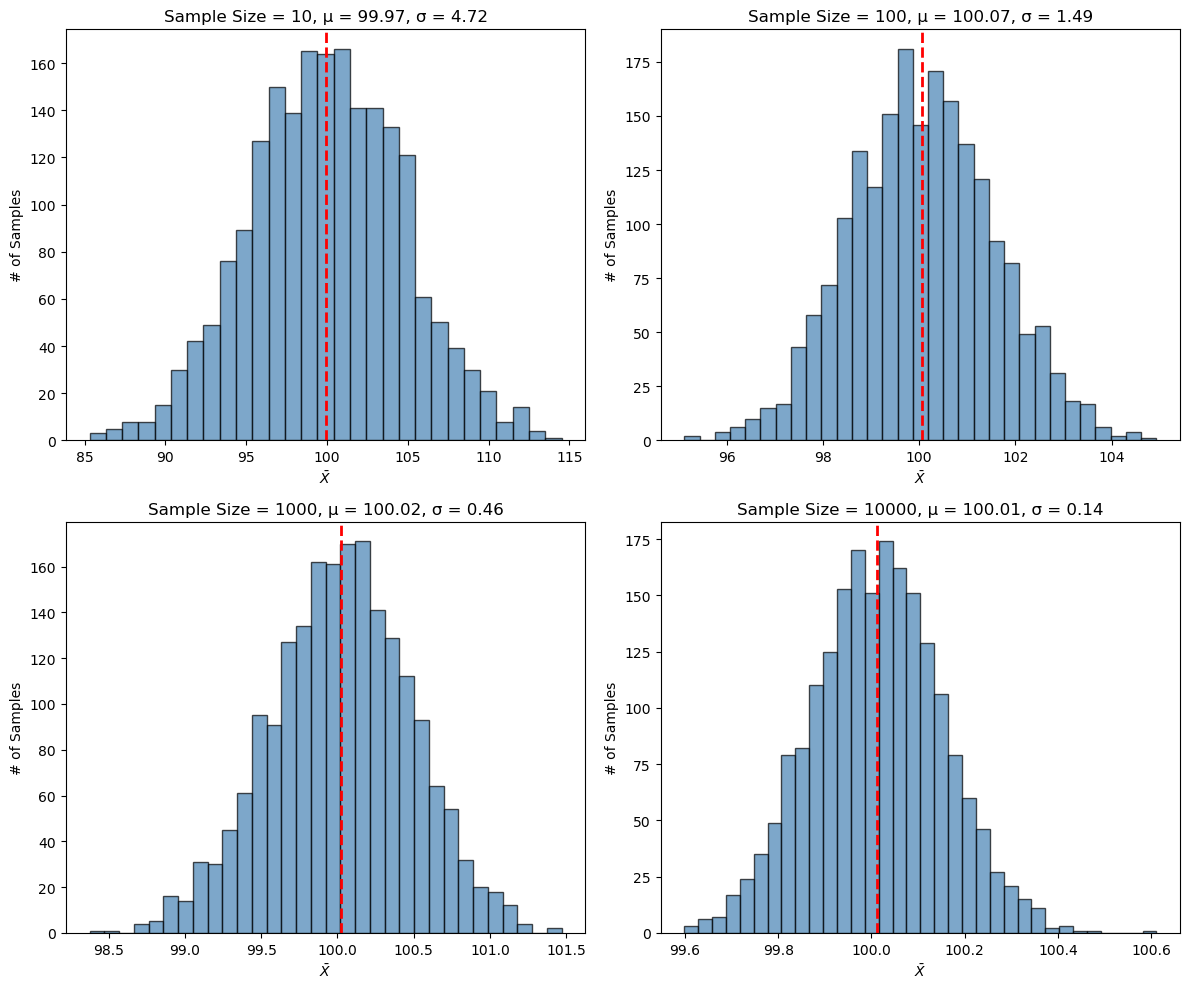

In [76]:
# Plotting
plt.figure(figsize=(12, 10))

# Create subplots
for i, size in enumerate(sample_sizes):
    sub_data = sample_means[size]
    mu = np.mean(sub_data)
    sigma = np.std(sub_data)
    plt.subplot(2, 2, i + 1)  # 2x2 grid, subplot index starts at 1
    plt.hist(sub_data, bins="auto", density=False, 
             alpha=0.7, color='steelblue', edgecolor='black')
    # Plot vertical line at the mean
    plt.axvline(mu, color='red', linestyle='--', linewidth=2)
    plt.title(f'Sample Size = {size}, μ = {mu:.2f}, σ = {sigma:.2f}')    
    plt.xlabel('$\\bar{{X}}$')
    plt.ylabel('# of Samples')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

我们直观可以感受到的是，不管样本大小为何，$\bar{X}$ 的平均值不变，和母体一样。但是随着样本大小逐渐增大，$\bar{X}$ 的标准差变得越来越小。

下面，我们具体算一下：

In [77]:
print(f"μ = {population_mu:.2f}, σ = {population_sigma:.2f}")
for sample_size in sample_sizes:
    sub_data = sample_means[sample_size]
    mu = np.mean(sub_data)
    sigma = np.std(sub_data)
    print(f"N = {sample_size}, Mean (X̄) = {mu:.2f}, Std (X̄) = {sigma:.2f}, " \
          f"σ/sqrt({sample_size}) = {(population_sigma/np.sqrt(sample_size)):.2f}")

μ = 100.01, σ = 15.01
N = 10, Mean (X̄) = 99.97, Std (X̄) = 4.72, σ/sqrt(10) = 4.75
N = 100, Mean (X̄) = 100.07, Std (X̄) = 1.49, σ/sqrt(100) = 1.50
N = 1000, Mean (X̄) = 100.02, Std (X̄) = 0.46, σ/sqrt(1000) = 0.47
N = 10000, Mean (X̄) = 100.01, Std (X̄) = 0.14, σ/sqrt(10000) = 0.15


结论：

从一个正态分布 $\mathcal{N}(\mu, \sigma^2)$ 的母体中，随机不放回抽取 $M$ 个大小为 $N$ 的样本，所有样本的平均值 $\bar{X}$ 的分布为：

$$
\bar{X} \sim \mathcal{N} \left( \mu, \frac{\sigma^2}{N} \right)
$$

### 解答问题

有了以上结论，最初的问题就很好解答了。

>全球人类的智商分布符合正态分布， $\mathcal{N}(100, 15^2)$。我们从全球 80 亿人中随机抽取 100 个人，这 100 人的平均智商大于等于 $110$ 的概率是多少？

从 80 亿人中抽取 100 人，假设我们抽取无数次，每次算出这 100 人的智商平均值 ($\bar{X}$)。$\bar{X}$ 的分布为：

$$\bar{X} \sim \mathcal{N} \left(100, \frac{15^2}{100} \right)$$

$\bar{X} = 100$ 对的 $Z$ 值为 $\frac{110 - 100}{1.5} = \frac{20}{3}$

In [78]:
import scipy.stats as stats

z = 20/3
prob_less_equal = stats.norm.cdf(z)
prob_greater_equal = 1 - prob_less_equal
print(f"P(Z ≥ {z:.2f}) = {prob_greater_equal:.4f}")

P(Z ≥ 6.67) = 0.0000


可以看到概率几乎为零。这也可以从上图 (Sample Size = 100) 明显看出来。

## 中心极限定理

上面我们是从正态分布的母体中抽样。假如我们从非正态分布的母体中抽样，每次也算出样本平均值，这些样本平均值的分布会怎么样？

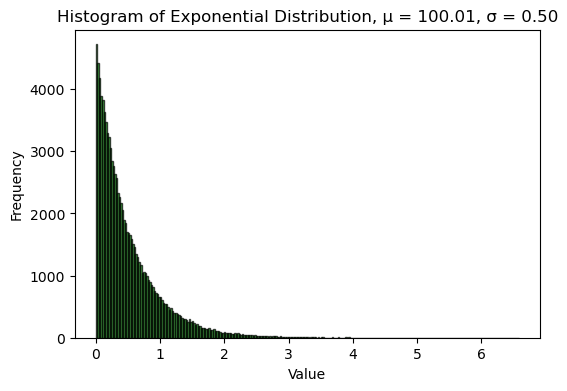

In [79]:
labmda_param = 2.0 
sample_size = 100000

data = np.random.exponential(1/labmda_param, sample_size)
pupulation_mu = np.mean(data)
population_sigma = np.std(data)

plt.figure(figsize=(6,4))
plt.hist(data, bins = "auto", density=False, 
         alpha = 0.7, color='green', 
         edgecolor='black')
plt.title(f"Histogram of Exponential Distribution, "\
          f"μ = {population_mu:.2f}, σ = {population_sigma:.2f}")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [80]:
num_samples = 2000
sample_sizes = [10, 100, 1000, 10000]
sample_means = {size: obtain_sample_means(
    data, size, num_samples) for size in sample_sizes}

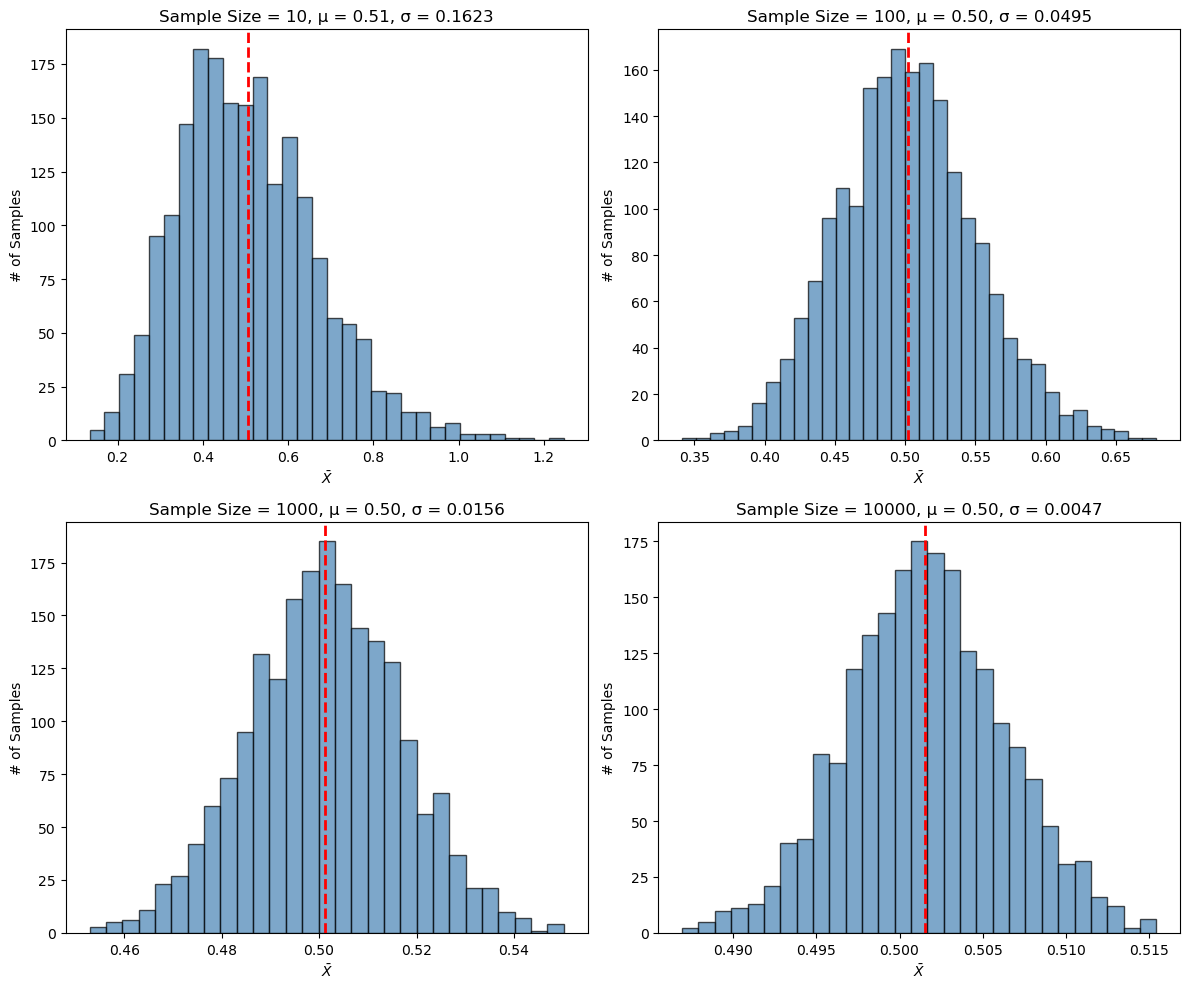

In [81]:
# Plotting
plt.figure(figsize=(12, 10))

# Create subplots
for i, size in enumerate(sample_sizes):
    sub_data = sample_means[size]
    mu = np.mean(sub_data)
    sigma = np.std(sub_data)
    plt.subplot(2, 2, i + 1)  # 2x2 grid, subplot index starts at 1
    plt.hist(sub_data, bins="auto", density=False, alpha=0.7, color='steelblue', edgecolor='black')
    # Plot vertical line at the mean
    plt.axvline(mu, color='red', linestyle='--', linewidth=2)
    plt.title(f'Sample Size = {size}, μ = {mu:.2f}, σ = {sigma:.4f}')    
    plt.xlabel('$\\bar{{X}}$')
    plt.ylabel('# of Samples')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [82]:
print(f"μ = {population_mu:.2f}, σ = {population_sigma:.2f}")
for sample_size in sample_sizes:
    sub_data = sample_means[sample_size]
    mu = np.mean(sub_data)
    sigma = np.std(sub_data)
    print(f"N = {sample_size}, Mean (X̄) = {mu:.2f}, Std (X̄) = {sigma:.4f}, " \
          f"σ/sqrt({sample_size}) = {(population_sigma/np.sqrt(sample_size)):.4f}")

μ = 100.01, σ = 0.50
N = 10, Mean (X̄) = 0.51, Std (X̄) = 0.1623, σ/sqrt(10) = 0.1591
N = 100, Mean (X̄) = 0.50, Std (X̄) = 0.0495, σ/sqrt(100) = 0.0503
N = 1000, Mean (X̄) = 0.50, Std (X̄) = 0.0156, σ/sqrt(1000) = 0.0159
N = 10000, Mean (X̄) = 0.50, Std (X̄) = 0.0047, σ/sqrt(10000) = 0.0050


我们看到，不管母体分布如何，只要每次样本的样本量足够大，$\bar{X}$ 的分布都无限趋近于正态分布。

结论是，不论母体分布是不是正态，假设母体平均值为 $\mu$，标准差为 $\sigma$，我们从母体中随机不放回抽取 $M$ 个大小为 $N$ 的样本，所有样本的平均值 $\bar{X}$ 的分布为：

$$\bar{X} \sim \mathcal{N} \left(\mu, \frac{\sigma}{\sqrt{N}} \right)$$

以上就是中心极限定理。至于「每次样本的样本量足够大」到底是多大，我们从上图中看到，如果母体是一个高度偏态分布，那么当 $N$ 大于 $1000$ 时，$\bar{X}$ 的分布就已经呈现正态分布的形态了。